In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
path='/Users/yanyan/Documents/MyCode/《Python for Data Analysis》学习与练习/pydata-book-3rd-edition/datasets/babynames'

In [6]:
!cat ./pydata-book-3rd-edition/datasets/babynames/yob1990.txt -n 10

In [9]:
names1880 = pd.read_csv(path+'/yob1880.txt',names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [11]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [12]:
years = range(1880,2011)
pieces = []
columns=['names','sex','births']

for year in years:
    frame = pd.read_csv(path+'/yob'+str(year)+'.txt',names=columns)
    frame['year']=year
    pieces.append(frame)

In [14]:
names = pd.concat(pieces,ignore_index=True)
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [15]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<AxesSubplot:xlabel='year'>

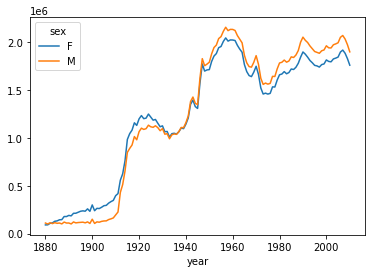

In [16]:
total_births.plot()

In [21]:
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [30]:
%%time
def calculate_prop(group):
    group['prop']=group['births']/group['births'].sum()
    return group

names=names.groupby(['year','sex']).apply(calculate_prop)
names

CPU times: user 254 ms, sys: 30.2 ms, total: 284 ms
Wall time: 284 ms


,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [31]:
names.groupby(['year','sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [36]:
%%time
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

top1000 = names.groupby(['year','sex']).apply(get_top1000)


CPU times: user 302 ms, sys: 5.27 ms, total: 307 ms
Wall time: 305 ms


In [39]:
top1000.reset_index(inplace=True,drop=True)
top1000

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [40]:
boys = top1000[top1000['sex']=='M']
girls = top1000[top1000['sex']=='F']

In [46]:
total_births = top1000.pivot_table('births',index='year',columns='names',aggfunc=sum)
total_births

names,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

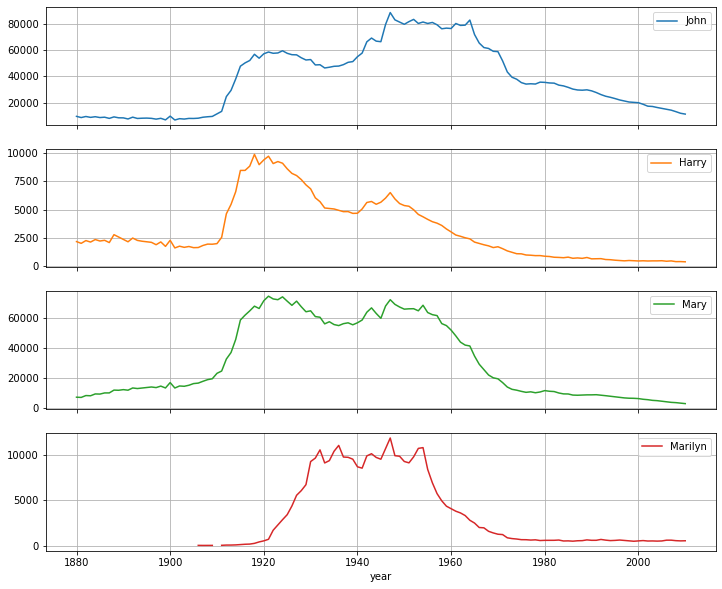

In [48]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=True)

In [51]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<AxesSubplot:xlabel='year'>

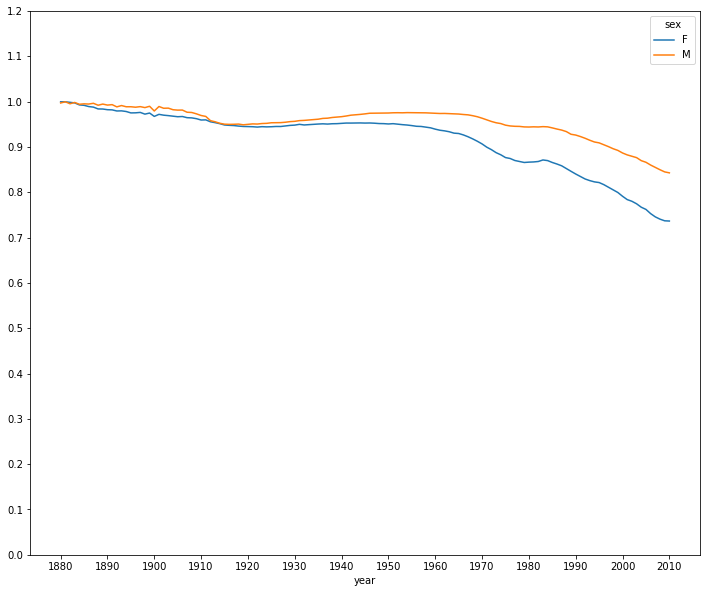

In [57]:
table.plot(yticks = np.linspace(0,1.2,13),xticks=range(1880,2020,10),figsize=(12,10))

<AxesSubplot:xlabel='year'>

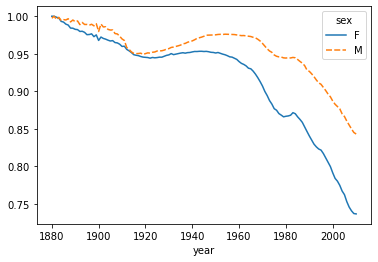

In [59]:
sns.lineplot(data=table)

In [60]:
df = boys[boys['year']==2010]
df

,names,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [61]:
prop_cumsum = df.sort_values(by='prop',ascending=False)['prop'].cumsum()
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [62]:
prop_cumsum.values.searchsorted(0.5)

116

In [68]:
%%time
def get_quantile_count(group,q=0.5):
    return group.sort_values(by='prop',ascending=False)['prop'].cumsum().values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity

CPU times: user 102 ms, sys: 4.56 ms, total: 107 ms
Wall time: 105 ms


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [69]:
diversity.unstack()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot:xlabel='year'>

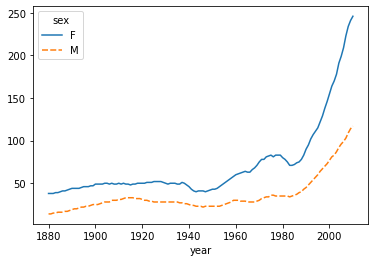

In [70]:
sns.lineplot(data=diversity.unstack())

In [71]:
boys

,names,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [101]:
boys['last_letter'] = boys['names'].map(lambda x: x[-1])
boys

/var/folders/7l/j9np0sbx1b33249mt44v25980000gn/T/ipykernel_4737/245567620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boys['last_letter'] = boys['names'].map(lambda x: x[-1])


,names,sex,births,year,prop,last_letter
942,John,M,9655,1880,0.087381,n
943,William,M,9533,1880,0.086277,m
944,James,M,5927,1880,0.053641,s
945,Charles,M,5348,1880,0.048401,s
946,George,M,5126,1880,0.046392,e
...,...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102,o
261873,Destin,M,194,2010,0.000102,n
261874,Jaquan,M,194,2010,0.000102,n
261875,Jaydan,M,194,2010,0.000102,n


In [113]:
frequent_table = boys.groupby(['year','last_letter'])['names'].count().unstack()
frequency_table = frequent_table.T/frequent_table.T.sum()

In [117]:
frequency_table.fillna(0,inplace=True)
frequency_table = frequency_table[[1910,1960,2010]]
frequency_table

year,1910,1960,2010
last_letter,,,
a,0.019,0.016,0.009
b,0.003,0.006,0.005
c,0.007,0.012,0.008
d,0.075,0.071,0.031
e,0.158,0.135,0.103
f,0.003,0.004,0.003
g,0.005,0.007,0.004
h,0.027,0.026,0.037
i,0.003,0.003,0.028


<AxesSubplot:xlabel='last_letter'>

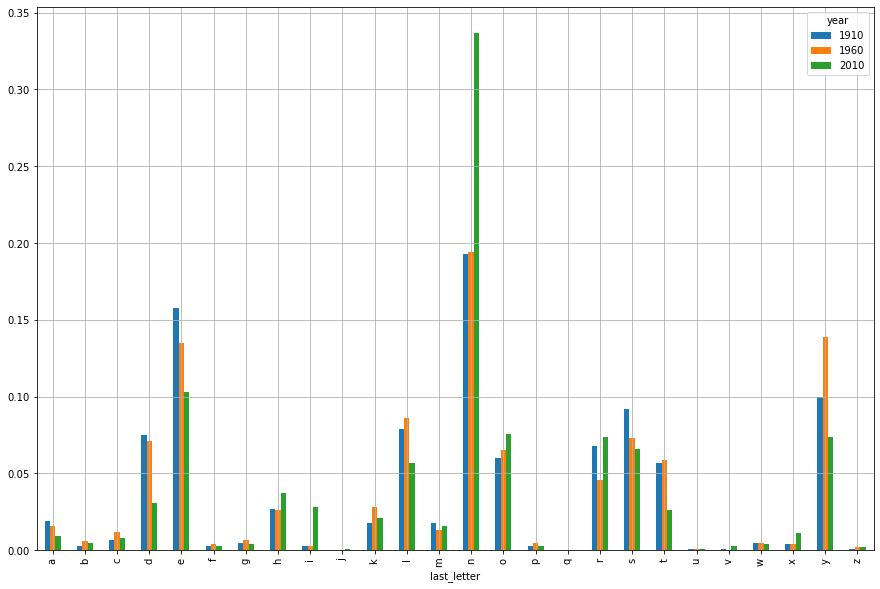

In [124]:
frequency_table.plot(kind='bar',figsize=(15,10),grid=True)

In [132]:
get_last_letter = lambda x: x[-1]
last_letters = names['names'].map(get_last_letter)
last_letters.names='last_letter'

125 ms ± 570 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [135]:
table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)
subtable = table.reindex(columns=[1910,1960,2010],level='year')
subtable

sex           F                            M                    
year       1910      1960      2010     1910      1960      2010
names                                                           
a      108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b           NaN     694.0     450.0    411.0    3912.0   38859.0
c           5.0      49.0     946.0    482.0   15476.0   23125.0
d        6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e      133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f           NaN      20.0      97.0    152.0    9224.0    2255.0
g          57.0     318.0     657.0    437.0   20235.0    2666.0
h       20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i         605.0   80812.0   55820.0    164.0    1286.0   42956.0
j           NaN       NaN     159.0      NaN       NaN    1459.0
k          48.0     315.0     626.0   7104.0  105315.0   35198.0
l       17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m         476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n       31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o         658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p           7.0      47.0      35.0    616.0   12102.0    2409.0
q           NaN       NaN      53.0      NaN       NaN     342.0
r        5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s       15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t       10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u         271.0    1161.0     734.0     24.0     122.0    2318.0
v           NaN     122.0     205.0     22.0      78.0    2723.0
w           8.0      63.0    2080.0   1229.0   16444.0   30656.0
x           6.0      74.0    1279.0    770.0    3947.0   16352.0
y       43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z         967.0    1333.0    1238.0     33.0     392.0    3476.0

In [136]:
letter_prop = subtable/subtable.sum()

<AxesSubplot:xlabel='names'>

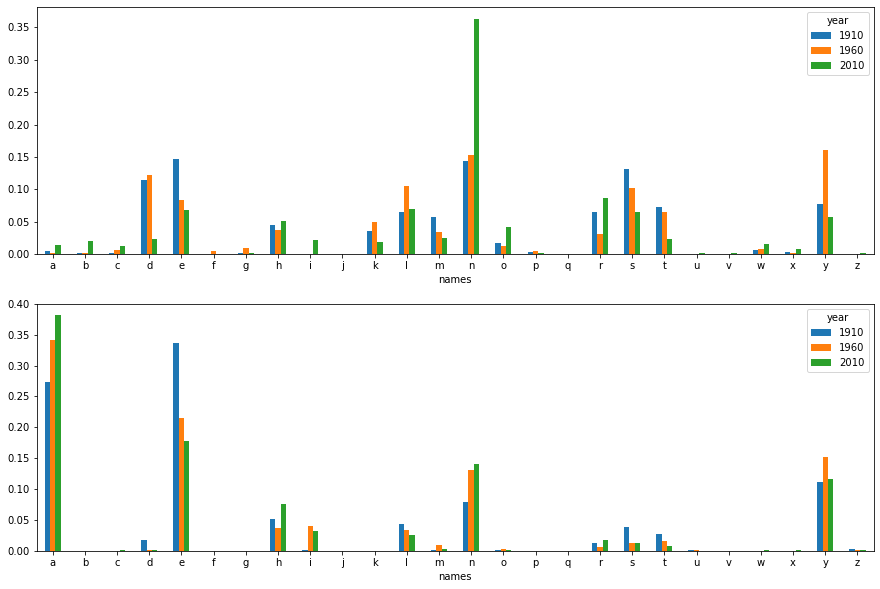

In [141]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(2,1,figsize=(15,10))

letter_prop['M'].plot(kind='bar',ax=axis[0],rot=0)
letter_prop['F'].plot(kind='bar',ax=axis[1],rot=0)

In [142]:
letter_prop

sex           F                             M                    
year       1910      1960      2010      1910      1960      2010
names                                                            
a      0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b           NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c      0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d      0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e      0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f           NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g      0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h      0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i      0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j           NaN       NaN  0.000090       NaN       NaN  0.000769
k      0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l      0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m      0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n      0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o      0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p      0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q           NaN       NaN  0.000030       NaN       NaN  0.000180
r      0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s      0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t      0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u      0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v           NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w      0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x      0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y      0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z      0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

In [148]:
dny_ts = table.loc[['d','n','y'],'M'].T
dny_ts

names,d,n,y
year,,,
1880,9177.0,16929.0,8371.0
1881,8387.0,15436.0,7803.0
1882,9702.0,17003.0,8815.0
1883,8796.0,15867.0,8281.0
1884,9856.0,17157.0,9202.0
...,...,...,...
2006,51410.0,720998.0,123707.0
2007,50595.0,741355.0,123397.0
2008,47910.0,733869.0,122633.0


<AxesSubplot:xlabel='year'>

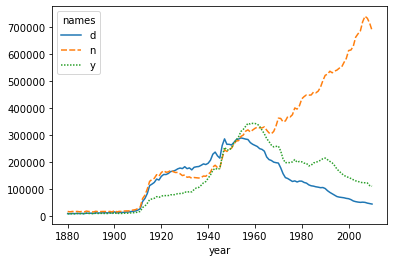

In [149]:
sns.lineplot(data=dny_ts)

In [150]:
all_names = pd.Series(top1000['names'].unique())
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [151]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [152]:
filtered = top1000[top1000['names'].isin(lesley_like)]
filtered

,names,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081
258378,Lesly,F,598,2009,0.000327
260073,Leslie,F,1558,2010,0.000886


In [153]:
filtered.groupby('names')['births'].sum()

names
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [154]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [156]:
table = table.div(table.sum(1),axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


<AxesSubplot:xlabel='year'>

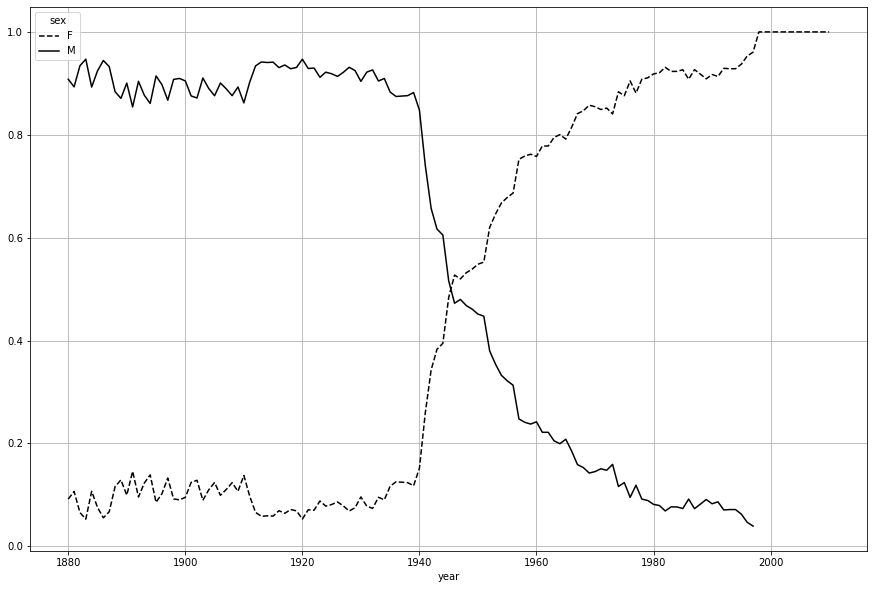

In [160]:
table.plot(style={'M':'k-','F':'k--'},figsize=(15,10),grid=True)